# Transfer Learning with Tensorflow - Part 2

In [ ]:
!nvidia-smi

Fri Oct 29 08:40:31 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    73W / 149W |   8445MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Creating helper functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-10-30 10:48:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-10-30 10:48:33 (67.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [ ]:
# get 10% of the 10 food classes data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
unzip_data(filename='10_food_classes_10_percent.zip')

--2021-10-30 10:48:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.128, 64.233.183.128, 173.194.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   154MB/s    in 1.0s    

2021-10-30 10:48:35 (154 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
# check out how many images and sub directories are in our dataset
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/c

In [ ]:
# create training and test directory paths
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32

In [ ]:
train_data_10_percent = image_dataset_from_directory(
    directory=train_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
    batch_size=BATCH_SIZE
)

test_data_10_percent = image_dataset_from_directory(
    directory=test_dir, 
    image_size=IMG_SIZE,
    label_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [ ]:
num_classes = len(train_data_10_percent.class_names)
print(train_data_10_percent.class_names)

['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']


In [ ]:
for images, labels in train_data_10_percent.take(1):
  print(images)

tf.Tensor(
[[[[2.32000000e+02 2.34000000e+02 2.29000000e+02]
   [2.32000000e+02 2.34000000e+02 2.29000000e+02]
   [2.32352036e+02 2.34076523e+02 2.29642853e+02]
   ...
   [2.41923477e+02 2.43076523e+02 2.37005142e+02]
   [2.45357147e+02 2.41357147e+02 2.39163284e+02]
   [2.45357147e+02 2.41357147e+02 2.41071426e+02]]

  [[2.33000000e+02 2.34000000e+02 2.29000000e+02]
   [2.33000000e+02 2.34000000e+02 2.29000000e+02]
   [2.34158157e+02 2.33214279e+02 2.31214279e+02]
   ...
   [2.45785721e+02 2.43198959e+02 2.33642899e+02]
   [2.46994919e+02 2.41928558e+02 2.36209213e+02]
   [2.47857147e+02 2.40071426e+02 2.37071426e+02]]

  [[2.33785721e+02 2.33000000e+02 2.31000000e+02]
   [2.33785721e+02 2.33000000e+02 2.31000000e+02]
   [2.34382645e+02 2.33000000e+02 2.31642853e+02]
   ...
   [2.49403107e+02 2.43045898e+02 2.33260193e+02]
   [2.50000000e+02 2.40571426e+02 2.34214279e+02]
   [2.50290787e+02 2.39290787e+02 2.35719360e+02]]

  ...

  [[1.80862259e+02 1.69862259e+02 1.49433731e+02]
   [1

## Rescale our images - NOT NECCESSARY FOR IMAGENET

In [ ]:
def rescale(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

In [ ]:
'''# rescale our training and test data
train_data_10_percent = train_data_10_percent.map(rescale)

test_data_10_percent = test_data_10_percent.map(rescale)'''

'# rescale our training and test data\ntrain_data_10_percent = train_data_10_percent.map(rescale)\n\ntest_data_10_percent = test_data_10_percent.map(rescale)'

In [ ]:
for images, labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[ 77.94388    69.94388    67.94388  ]
   [ 87.45408    79.45408    77.45408  ]
   [ 88.005104   79.57653    77.79082  ]
   ...
   [ 40.36217    28.933643   24.076588 ]
   [ 36.857117   27.         25.928558 ]
   [ 29.872402   23.872402   25.872402 ]]

  [[ 78.831635   70.831635   68.831635 ]
   [ 91.79592    83.79592    81.79592  ]
   [ 91.67347    83.67347    81.67347  ]
   ...
   [ 42.056015   30.627487   25.770432 ]
   [ 36.785675   26.928558   25.857117 ]
   [ 32.239727   23.239729   25.045916 ]]

  [[ 72.51021    64.15306    64.938774 ]
   [ 87.62755    80.05612    78.484695 ]
   [ 91.61735    83.448975   81.95408  ]
   ...
   [ 43.025406   31.596878   27.16835  ]
   [ 37.19898    27.198977   26.198977 ]
   [ 33.933647   24.933647   25.933647 ]]

  ...

  [[ 52.637653   31.147799   25.999891 ]
   [ 59.300976   36.15803    31.51524  ]
   [ 59.68875    36.19378    31.688728 ]
   ...
   [103.0205     31.449026    7.234762 ]
   [105.015366   33.01537     9.015368 ]
   [1

## Use a model from `tf.keras.applications` to make a prediction on our dataset

In [ ]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top=False,
    input_shape=IMG_SIZE+(3,),
    pooling='avg'
)

In [ ]:
base_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_3')>

In [ ]:
base_model.output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'avg_pool')>

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, 224, 224, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
normalization_2 (Normalization) (None, 224, 224, 3)  7           rescaling_2[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_2[0][0]            
_____________________________________________________________________________________

In [ ]:
# add correct output layer for our specific classification problem
x = base_model.output
x = tf.keras.layers.Dense(10,activation='softmax')(x)

In [ ]:
# build the model
model = tf.keras.models.Model(inputs=base_model.input,outputs=x)

In [ ]:
# freeze weights of the base model
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics='accuracy'
)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, 224, 224, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
normalization_2 (Normalization) (None, 224, 224, 3)  7           rescaling_2[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_2[0][0]            
____________________________________________________________________________________________

In [ ]:
fraction_of_valdata = 1

In [ ]:
history_1 = model.fit(train_data_10_percent,
          steps_per_epoch=len(train_data_10_percent),
          epochs=5,
          validation_data=test_data_10_percent,
          validation_steps=int(fraction_of_valdata*len(test_data_10_percent)))

Epoch 1/5
24/24 [==============================] - 23s 660ms/step - loss: 1.9485 - accuracy: 0.3733 - val_loss: 1.3860 - val_accuracy: 0.7008
Epoch 2/5
24/24 [==============================] - 14s 580ms/step - loss: 1.1643 - accuracy: 0.7560 - val_loss: 0.9449 - val_accuracy: 0.8040
Epoch 3/5
24/24 [==============================] - 14s 578ms/step - loss: 0.8443 - accuracy: 0.8173 - val_loss: 0.7615 - val_accuracy: 0.8216
Epoch 4/5
24/24 [==============================] - 14s 578ms/step - loss: 0.6912 - accuracy: 0.8387 - val_loss: 0.6690 - val_accuracy: 0.8340
Epoch 5/5
24/24 [==============================] - 14s 579ms/step - loss: 0.5887 - accuracy: 0.8587 - val_loss: 0.6170 - val_accuracy: 0.8344


In [ ]:
# check the layers in the base model
for i, layer in enumerate(base_model.layers):
  print(i,layer.name)

0 input_3
1 rescaling_2
2 normalization_2
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_d

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, 224, 224, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
normalization_2 (Normalization) (None, 224, 224, 3)  7           rescaling_2[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_2[0][0]            
____________________________________________________________________________________________

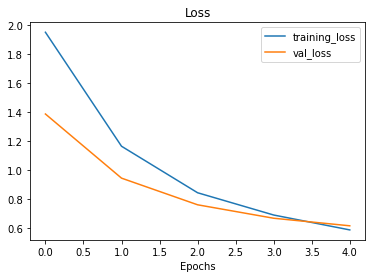

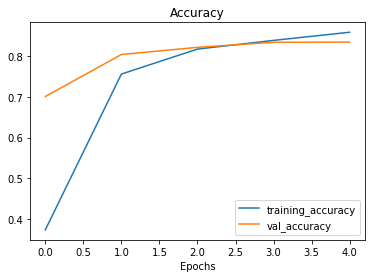

In [ ]:
plot_loss_curves(history_1)

### Passing a tensor (aka feature vector) into the globalaveragepooling layer

In [ ]:
input_shape=(1,4,4,3)
tensor = tf.random.normal(input_shape)
print(tensor,"\n")
pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(tensor)
print(pooled_tensor)

tf.Tensor(
[[[[ 0.17387113 -0.2731346   0.25899607]
   [-1.2832279  -0.5663168  -0.88691336]
   [ 1.4166385   1.0846846   0.15312243]
   [ 0.54275     1.053323   -1.9446841 ]]

  [[-0.2970195   0.16451566 -1.0538659 ]
   [-0.6436155   0.402886    1.3298259 ]
   [ 0.6300985   0.28094438  1.0256573 ]
   [-0.5534186   1.0614864   0.02833662]]

  [[ 0.67109734 -0.17965278  1.218531  ]
   [-0.34780067  0.00751022 -2.0235596 ]
   [-0.09006869 -0.16081491 -1.7006999 ]
   [ 0.41147265 -1.0373179  -0.4713448 ]]

  [[ 1.5326496  -1.0815427  -0.5610501 ]
   [-0.7287277   0.08044914 -0.4060361 ]
   [ 1.6680522   3.6484928  -0.45437565]
   [ 0.30900043 -0.54678935 -0.7674906 ]]]], shape=(1, 4, 4, 3), dtype=float32) 

tf.Tensor([[ 0.2132345   0.24617021 -0.39097193]], shape=(1, 3), dtype=float32)


In [ ]:
np.mean(tensor[0,:,:,0])

0.21323448

In [ ]:
np.mean(tensor[0,:,:,1])

0.2461702

In [ ]:
np.mean(tensor[0,:,:,2])

-0.39097193

In [ ]:
tf.reduce_mean(tensor,axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 0.2132345 ,  0.24617021, -0.39097193]], dtype=float32)>

### Another way of using a base model

In [ ]:
# 1. Get the base_model
base_model = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top=False,
)

# 2. Configure our layer to be not trainable
base_model.trainable = False

# 3. Define the inputs
inputs = tf.keras.layers.Input(shape=IMG_SIZE+(3,))

# 4. Pass Inputs trough the base_model
x = base_model(inputs)

In [ ]:
# 5. Average Pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# 6. Add our output activation layer
outputs = tf.keras.layers.Dense(10,activation='sigmoid')(x)

In [ ]:
# 7. Define the model with our inputs and outputs
model = tf.keras.Model(inputs=inputs,outputs=outputs)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


## Create the model for only 1 Percent of the training data

### define the imports

In [ ]:
# IMPORTS
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

# preprocessing
from tensorflow.keras.layers.experimental import preprocessing

### download the data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2021-10-29 08:42:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.182.128, 173.194.197.128, 173.194.198.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.182.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   145MB/s    in 0.9s    

2021-10-29 08:42:11 (145 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
unzip_data(filename='10_food_classes_1_percent.zip')

In [ ]:
# create training and test directory paths
train_dir = '10_food_classes_1_percent/train'
test_dir = '10_food_classes_1_percent/test'

In [ ]:
IMG_SIZE=(224,224)
BATCH_SIZE=32

In [ ]:
train_data_1_percent = image_dataset_from_directory(
    directory=train_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
    batch_size=BATCH_SIZE
)

test_data_1_percent = image_dataset_from_directory(
    directory=test_dir, 
    image_size=IMG_SIZE,
    label_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Create a data augmentation layer

In [ ]:
data_augmentation = tf.keras.Sequential([
  preprocessing.RandomFlip("horizontal",input_shape=IMG_SIZE+(3,)),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2)
], name='data_augmentation')

In [ ]:
train_data_1_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

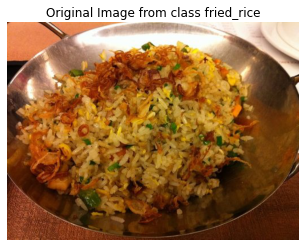

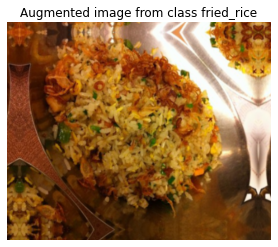

In [ ]:
# select a random image
target_class = random.choice(train_data_1_percent.class_names)
target_dir = train_dir + '/' + target_class

# plot the original image
random_image = random.choice(os.listdir(target_dir))
img = mpimg.imread(target_dir+'/'+random_image)
plt.imshow(img)
plt.title(f"Original Image from class {target_class}")
plt.axis(False)
plt.show()

# now plot the augmented image
augmented_image = data_augmentation(img)
plt.imshow(tf.cast(augmented_image,dtype=tf.dtypes.int16)) # or just divide by 255. to get a range of
plt.title(f"Augmented image from class {target_class}") 
plt.axis(False)
plt.show()

### Create the model - Transfer Learning Feature Extraction

In [ ]:
# setup the input shape and base model

inputs = tf.keras.layers.Input(shape=IMG_SIZE+(3,),name='input_layer')

model_base = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top = False
)

model_base.trainabel = False

# pass the inputs to the data augementation
x = data_augmentation(inputs)

# pass augmented data to the base model
x = base_model(x, training=False)

# pool outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name='avg_pool_layer')(x)

# output
outputs = tf.keras.layers.Dense(10,activation='sigmoid', name='output_layer')(x)

# create the model
model = tf.keras.Model(inputs,outputs)

In [ ]:
# compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics='accuracy'
)

In [ ]:
history = model.fit(train_data_1_percent,
          epochs=5,
          steps_per_epoch=len(train_data_1_percent),
          validation_data=test_data_1_percent,
          validation_steps=int(0.5*len(test_data_1_percent)),
          callbacks=[create_tensorboard_callback(dir_name='transfer_learning',experiment_name='1_percent_data_augmented')])

Saving TensorBoard log files to: transfer_learning/1_percent_data_augmented/20211029-084217
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


3/3 [==============================] - 17s 5s/step - loss: 2.3771 - accuracy: 0.1143 - val_loss: 2.2554 - val_accuracy: 0.1739
Epoch 2/5
3/3 [==============================] - 7s 3s/step - loss: 2.1435 - accuracy: 0.2571 - val_loss: 2.1265 - val_accuracy: 0.2692
Epoch 3/5
3/3 [==============================] - 7s 3s/step - loss: 1.9453 - accuracy: 0.4143 - val_loss: 2.0057 - val_accuracy: 0.3622
Epoch 4/5
3/3 [==============================] - 11s 6s/step - loss: 1.7824 - accuracy: 0.5286 - val_loss: 1.9162 - val_accuracy: 0.4439
Epoch 5/5
3/3 [==============================] - 12s 6s/step - loss: 1.6314 - accuracy: 0.6286 - val_loss: 1.8257 - val_accuracy: 0.4968


In [ ]:
# evaluate on the full test data set
results_1_percent_test_data = model.evaluate(test_data_1_percent)

79/79 [==============================] - 11s 130ms/step - loss: 1.8306 - accuracy: 0.4868


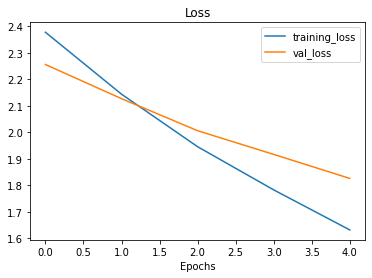

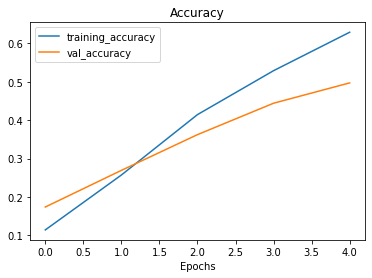

In [ ]:
# plot loss and acc curves
plot_loss_curves(history)

## Create model 2 with 10 percent of training data and data augmentation

In [ ]:
# data is already downloaded and available

In [ ]:
# create training and test directory paths
train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

In [ ]:
train_data_10_percent = image_dataset_from_directory(
    directory=train_dir,
    image_size=IMG_SIZE,
    label_mode="categorical",
    batch_size=BATCH_SIZE
)

test_data_10_percent = image_dataset_from_directory(
    directory=test_dir, 
    image_size=IMG_SIZE,
    label_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
data_augmentation = tf.keras.Sequential([
  preprocessing.RandomFlip("horizontal",input_shape=IMG_SIZE+(3,)),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2)
], name='data_augmentation')

In [ ]:
# setup the input shape and base model

inputs = tf.keras.layers.Input(shape=IMG_SIZE+(3,),name='input_layer')

model_base_2 = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top = False
)

# set the trainable to false
model_base_2.trainable=False

# pass the inputs to the data augementation
x = data_augmentation(inputs)

# pass augmented data to the base model
x = model_base_2(x, training=False)

# pool outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name='avg_pool_layer')(x)

# output
outputs = tf.keras.layers.Dense(10,activation='sigmoid', name='output_layer')(x)

# create the model
model = tf.keras.Model(inputs,outputs)

print(model_base_2.trainable)

False


In [ ]:
# compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics='accuracy'
)

In [ ]:
history_10_percent_augmented = model.fit(train_data_10_percent,
          epochs=5,
          steps_per_epoch=len(train_data_10_percent),
          validation_data=test_data_10_percent,
          validation_steps=int(0.5*len(test_data_10_percent)),
          callbacks=
          [
            create_tensorboard_callback(dir_name='transfer_learning',experiment_name='model_2'),
            tf.keras.callbacks.ModelCheckpoint('ModelCheckpoints/10_percent_data_augmented_weights',save_best_only=True,save_weights_only=True)
          ])

Saving TensorBoard log files to: transfer_learning/model_2/20211029-093054
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 24s 690ms/step - loss: 1.9952 - accuracy: 0.3253 - val_loss: 1.5216 - val_accuracy: 0.6314
Epoch 2/5
24/24 [==============================] - 19s 760ms/step - loss: 1.3641 - accuracy: 0.6600 - val_loss: 1.0536 - val_accuracy: 0.7788
Epoch 3/5
24/24 [==============================] - 14s 578ms/step - loss: 1.0560 - accuracy: 0.7387 - val_loss: 0.8477 - val_accuracy: 0.8197
Epoch 4/5
24/24 [==============================] - 18s 748ms/step - loss: 0.8989 - accuracy: 0.7800 - val_loss: 0.7315 - val_accuracy: 0.8397
Epoch 5/5
24/24 [==============================] - 19s 771ms/step - loss: 0.7773 - accuracy: 0.8120 - val_loss: 0.6838 - val_accuracy: 0.8333


In [ ]:
# evaluate on the full test data set
results_10_percent_test_data = model.evaluate(test_data_10_percent)

79/79 [==============================] - 11s 129ms/step - loss: 0.6952 - accuracy: 0.8212


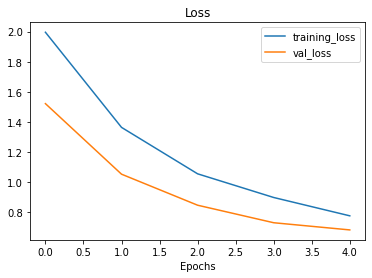

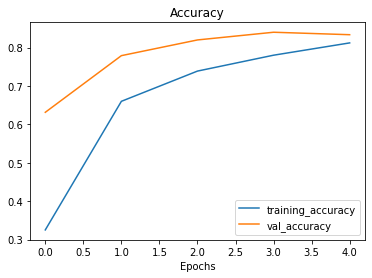

In [ ]:
# plot loss and acc curves
plot_loss_curves(history_10_percent_augmented)

In [ ]:
model.load_weights('ModelCheckpoints/10_percent_data_augmented_weights')

In [ ]:
results_10_percent_test_data_loaded_weights = model.evaluate(test_data_10_percent)

79/79 [==============================] - 11s 130ms/step - loss: 0.6952 - accuracy: 0.8212


In [ ]:
np.isclose(np.array(results_10_percent_test_data),np.array(results_10_percent_test_data_loaded_weights))

array([ True,  True])

## Fine Tuning in Transfer Learning - Model 3


In [ ]:
# chech the trainability of model 2 layers
for layer in model.layers:
  print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f1cccda6110> True
<keras.engine.sequential.Sequential object at 0x7f1cc982f610> True
<keras.engine.functional.Functional object at 0x7f1ccc86c690> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7f1cccda6810> True
<keras.layers.core.Dense object at 0x7f1ccc978050> True


In [ ]:
for i, layer in enumerate(model.layers[2].layers):
  print(i, layer.name, '----' , layer.trainable)

0 input_24 ---- False
1 rescaling_22 ---- False
2 normalization_22 ---- False
3 stem_conv_pad ---- False
4 stem_conv ---- False
5 stem_bn ---- False
6 stem_activation ---- False
7 block1a_dwconv ---- False
8 block1a_bn ---- False
9 block1a_activation ---- False
10 block1a_se_squeeze ---- False
11 block1a_se_reshape ---- False
12 block1a_se_reduce ---- False
13 block1a_se_expand ---- False
14 block1a_se_excite ---- False
15 block1a_project_conv ---- False
16 block1a_project_bn ---- False
17 block2a_expand_conv ---- False
18 block2a_expand_bn ---- False
19 block2a_expand_activation ---- False
20 block2a_dwconv_pad ---- False
21 block2a_dwconv ---- False
22 block2a_bn ---- False
23 block2a_activation ---- False
24 block2a_se_squeeze ---- False
25 block2a_se_reshape ---- False
26 block2a_se_reduce ---- False
27 block2a_se_expand ---- False
28 block2a_se_excite ---- False
29 block2a_project_conv ---- False
30 block2a_project_bn ---- False
31 block2b_expand_conv ---- False
32 block2b_expand_

In [ ]:
# how many trainable weights are in our base model?
print(len(model.layers[2].trainable_variables))

NameError: ignored

In [ ]:
# set model to trainable
model_base.trainable = True

# set all layers except the last 10 to true
for layer in model_base.layers[:-10]:
  layer.trainable=False

In [ ]:
for i, layer in enumerate(model_base.layers):
  print(i, layer.name, '----' , layer.trainable)

0 input_17 ---- False
1 rescaling_15 ---- False
2 normalization_15 ---- False
3 stem_conv_pad ---- False
4 stem_conv ---- False
5 stem_bn ---- False
6 stem_activation ---- False
7 block1a_dwconv ---- False
8 block1a_bn ---- False
9 block1a_activation ---- False
10 block1a_se_squeeze ---- False
11 block1a_se_reshape ---- False
12 block1a_se_reduce ---- False
13 block1a_se_expand ---- False
14 block1a_se_excite ---- False
15 block1a_project_conv ---- False
16 block1a_project_bn ---- False
17 block2a_expand_conv ---- False
18 block2a_expand_bn ---- False
19 block2a_expand_activation ---- False
20 block2a_dwconv_pad ---- False
21 block2a_dwconv ---- False
22 block2a_bn ---- False
23 block2a_activation ---- False
24 block2a_se_squeeze ---- False
25 block2a_se_reshape ---- False
26 block2a_se_reduce ---- False
27 block2a_se_expand ---- False
28 block2a_se_excite ---- False
29 block2a_project_conv ---- False
30 block2a_project_bn ---- False
31 block2b_expand_conv ---- False
32 block2b_expand_

In [ ]:
# compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics='accuracy'
)

In [ ]:
history_10_percent_augmented_finetuned = model.fit(train_data_10_percent,
          epochs=5,
          steps_per_epoch=len(train_data_10_percent),
          validation_data=test_data_10_percent,
          validation_steps=int(0.5*len(test_data_10_percent)),
          callbacks=
          [
            create_tensorboard_callback(dir_name='transfer_learning',experiment_name='model_2'),
            tf.keras.callbacks.ModelCheckpoint('ModelCheckpoints/10_percent_data_augmented_weights',save_best_only=True,save_weights_only=True)
          ])

## Fine Tuning Transfer Learning with 100% of the training data + data augmentation layer - Model 4

In [ ]:
# IMPORTS
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the data
from tensorflow.keras.preprocessing import image_dataset_from_directory

# preprocessing - data augmentation
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
IMG_SIZE=(224,224)
BATCH_SIZE = 32

### Load our helperfunctions again

In [ ]:
# get the .py file to colab
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-10-30 10:49:07--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-10-30 10:49:07 (47.6 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
# load in the helper functions
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

### Get the data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2021-10-30 10:49:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.197.128, 173.194.198.128, 64.233.191.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   174MB/s    in 2.8s    

2021-10-30 10:49:10 (174 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# unzip the data into folder
all_data_main_dir = '10_food_classes_all_data'
unzip_data(f'{all_data_main_dir}.zip')

In [ ]:
# walk through the data
walk_through_dir(all_data_main_dir)

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.

In [ ]:
# set up train and test directories
train_dir = all_data_main_dir + '/train'
test_dir = all_data_main_dir + '/test'

In [ ]:
# load the data from the directories
train_data_all = image_dataset_from_directory(
    directory=train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

test_data_all = image_dataset_from_directory(
    directory=test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Prepare the model layers

In [ ]:
# set up the data augementation layers
data_augmentation = tf.keras.Sequential([
  preprocessing.RandomFlip('horizontal',input_shape=IMG_SIZE+(3,)),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomRotation(0.2)
], name='data_augementation_layer')

In [ ]:
# set up the input layer for the base model
inputs = tf.keras.layers.Input(shape=IMG_SIZE+(3,),name='input_layer')

In [ ]:
# set up the base model
base_model = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top = False
)

# set the model trainable layers to false
base_model.trainable = False

# pass our inputs through the augmentation layer
x = data_augmentation(inputs)

# pass our augmented inputs to the base model
# set the batch_norm training mode to false
x = base_model(x, training = False)

# create the avg pooling layer and pass it the base_model outputs
x = tf.keras.layers.GlobalAveragePooling2D(name='avg_pooling_layer')(x)

# create the output classification layer
outputs = tf.keras.layers.Dense(10,activation='sigmoid', name='output_layer')(x)

16719872/16705208 [==============================] - 0s 0us/step


In [ ]:
# create the full model
model_4 = tf.keras.Model(inputs,outputs)

In [ ]:
# compile the model
model_4.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics='accuracy'
)

In [ ]:
# get a model summary
model_4.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augementation_layer (Se (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
avg_pooling_layer (GlobalAve (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [ ]:
for layer in model_4.layers:
  print(layer.name,'----', layer.trainable)

input_layer ---- True
data_augementation_layer ---- True
efficientnetb0 ---- False
avg_pooling_layer ---- True
output_layer ---- True


In [ ]:
# set the inital epochs = how long we train the model with freezed weights
initial_epochs = 5

In [ ]:
# fit the model on the whole training samples and validate on the test data
history_model_4 = model_4.fit(
    train_data_10_percent,
    epochs=initial_epochs,
    steps_per_epoch=len(train_data_10_percent),
    validation_data=test_data_all,
    validation_steps=int(0.25*len(test_data_all)),
    callbacks=[
        create_tensorboard_callback(dir_name='Tensorboard',experiment_name='Model4_frozen'),
        tf.keras.callbacks.ModelCheckpoint('ModelCheckpoints/Model4_frozen/weights',save_best_only=True,save_weights_only=True)
    ]
)

Saving TensorBoard log files to: Tensorboard/Model4_frozen/20211030-104922
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 58s 932ms/step - loss: 2.0627 - accuracy: 0.3080 - val_loss: 1.5625 - val_accuracy: 0.5970
Epoch 2/5
24/24 [==============================] - 18s 749ms/step - loss: 1.4310 - accuracy: 0.6293 - val_loss: 1.1050 - val_accuracy: 0.7270
Epoch 3/5
24/24 [==============================] - 14s 565ms/step - loss: 1.0808 - accuracy: 0.7440 - val_loss: 0.8935 - val_accuracy: 0.7961
Epoch 4/5
24/24 [==============================] - 13s 534ms/step - loss: 0.9289 - accuracy: 0.7720 - val_loss: 0.7952 - val_accuracy: 0.8059
Epoch 5/5
24/24 [==============================] - 13s 512ms/step - loss: 0.7962 - accuracy: 0.7907 - val_loss: 0.7131 - val_accuracy: 0.8273


In [ ]:
# evaluate our model after training with frozen base model weights
model_4.evaluate(test_data_all)

79/79 [==============================] - 11s 133ms/step - loss: 0.7095 - accuracy: 0.8144


[0.7095258235931396, 0.8144000172615051]

In [ ]:
# for fine tuning set the last 10 layers to trainable
for layer in model_4.layers[2].layers[10:]:
  layer.trainable=True

In [ ]:
# compile the fine tuned model again with a lower learing rate 
model_4.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics='accuracy'
)

In [ ]:
# set the new epochs, how long our model should train
end_epochs = initial_epochs + 5

In [ ]:
# check the trainability of the model
for layer in model_4.layers:
  print(layer.name,'----', layer.trainable)

In [ ]:
# fit the fine tuned model
history_finetune_model_4 = model_4.fit(
    train_data_all,
    epochs=end_epochs,
    initial_epoch=initial_epochs,
    steps_per_epoch=len(train_data_all),
    validation_data=test_data_all,
    validation_steps=int(0.25*len(test_data_all)),
    callbacks=[
        create_tensorboard_callback(dir_name='Tensorboard',experiment_name='Model4_finetune'),
        tf.keras.callbacks.ModelCheckpoint('ModelCheckpoints/Model4_finetune/weights',save_best_only=True,save_weights_only=True)
    ]
)

Saving TensorBoard log files to: Tensorboard/Model4_finetune/20211030-105150


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 6/10
235/235 [==============================] - 99s 387ms/step - loss: 0.9149 - accuracy: 0.7253 - val_loss: 0.6427 - val_accuracy: 0.8388
Epoch 7/10
235/235 [==============================] - 76s 323ms/step - loss: 0.8491 - accuracy: 0.7471 - val_loss: 0.5726 - val_accuracy: 0.8586
Epoch 8/10
235/235 [==============================] - 72s 304ms/step - loss: 0.8105 - accuracy: 0.7568 - val_loss: 0.5443 - val_accuracy: 0.8569
Epoch 9/10
235/235 [==============================] - 68s 287ms/step - loss: 0.7769 - accuracy: 0.7652 - val_loss: 0.5413 - val_accuracy: 0.8503
Epoch 10/10
235/235 [==============================] - 63s 266ms/step - loss: 0.7543 - accuracy: 0.7695 - val_loss: 0.4816 - val_accuracy: 0.8734


In [ ]:
# evaluate the model on the full test dataset
model_4.evaluate(test_data_all)

79/79 [==============================] - 11s 128ms/step - loss: 0.5164 - accuracy: 0.8456


[0.5163664817810059, 0.8456000089645386]

In [ ]:
!tensorboard dev upload \
--logdir Tensorboard/Model4_finetune \
--name 'Tensorboard of the Model 4 fine tuned' \
--description 'Test'\
--one_shot

2021-10-30 11:01:47.182663: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 11:01:47.200286: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 11:01:47.201031: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

Tensorboard/Model4_finetune

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> 

In [ ]:
!tensorboard dev list

2021-10-30 11:06:52.382572: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 11:06:52.391604: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 11:06:52.392305: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
https://tensorboard.dev/experiment/KDuEKg2fRoKcVvb7mAmylg/
	Name                 Tensorboard of the Model 4 fine tuned
	Description          Test--one_shot
	Id                   KDuEKg2fRoKcVvb7mAmylg
	Created              2021-10-30 11:02:10 (4 minutes ago)
	Updated              2021-10-30 11:02:11 (4 minutes ago)
	Runs                 2

In [ ]:
!tensorboard dev delete --experiment_id 'sAf3Lsd9SdiMlNzRzJBnJA'

2021-10-30 11:07:36.786144: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 11:07:36.795007: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 11:07:36.795648: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
Deleted experiment sAf3Lsd9SdiMlNzRzJBnJA.


In [ ]:
!tensorboard dev list

2021-10-30 11:07:48.474904: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 11:07:48.484578: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 11:07:48.485313: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
https://tensorboard.dev/experiment/KDuEKg2fRoKcVvb7mAmylg/
	Name                 Tensorboard of the Model 4 fine tuned
	Description          Test--one_shot
	Id                   KDuEKg2fRoKcVvb7mAmylg
	Created              2021-10-30 11:02:10 (5 minutes ago)
	Updated              2021-10-30 11:02:11 (5 minutes ago)
	Runs                 2

In [ ]:
!tensorboard dev delete --experiment_id "KDuEKg2fRoKcVvb7mAmylg"

2021-10-30 11:08:24.962384: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 11:08:24.971584: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-30 11:08:24.972274: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
Deleted experiment KDuEKg2fRoKcVvb7mAmylg.
